# Data visualization, cleaning and feature engineering.

In [1]:
# Importing libraries for EDA.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../../Porter_NN.csv')
df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0


In [3]:
df.shape

(175777, 14)

We have 14 features.

In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175777 entries, 0 to 175776
Data columns (total 14 columns):
 #   Column                                        Non-Null Count   Dtype  
---  ------                                        --------------   -----  
 0   market_id                                     175777 non-null  float64
 1   created_at                                    175777 non-null  object 
 2   actual_delivery_time                          175777 non-null  object 
 3   store_primary_category                        175777 non-null  int64  
 4   order_protocol                                175777 non-null  float64
 5   total_items                                   175777 non-null  int64  
 6   subtotal                                      175777 non-null  int64  
 7   num_distinct_items                            175777 non-null  int64  
 8   min_item_price                                175777 non-null  int64  
 9   max_item_price                                17

We have all non null values and two non-numeric values

In [5]:
# Converting object datatype to datetime.
df['created_at'] = pd.to_datetime(df['created_at'])
df['actual_delivery_time'] = pd.to_datetime(df['actual_delivery_time'])

# Making the target column.
df['delivery_time_minutes'] = (df['actual_delivery_time'] - df['created_at']).dt.total_seconds() / 60

In [6]:
# Our target feature.
df['delivery_time_minutes']

0         47.0
1         44.0
2         55.0
3         59.0
4         46.0
          ... 
175772    43.0
175773    62.0
175774    46.0
175775    45.0
175776    37.0
Name: delivery_time_minutes, Length: 175777, dtype: float64

In [7]:
# Extracting more from our datetime columns to create useful features.
df['order_day'] = df['created_at'].dt.dayofweek
df['order_hour'] = df['created_at'].dt.hour
df['order_date'] = df['created_at'].dt.day

df.head()

,market_id,created_at,actual_delivery_time,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_time_minutes,order_day,order_hour,order_date
0,1.0,2015-02-06 22:24:17,2015-02-06 23:11:17,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,47.0,4,22,6
1,2.0,2015-02-10 21:49:25,2015-02-10 22:33:25,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,44.0,1,21,10
2,2.0,2015-02-16 00:11:35,2015-02-16 01:06:35,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,55.0,0,0,16
3,1.0,2015-02-12 03:36:46,2015-02-12 04:35:46,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,59.0,3,3,12
4,1.0,2015-01-27 02:12:36,2015-01-27 02:58:36,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,46.0,1,2,27


<Axes: xlabel='delivery_time_minutes', ylabel='Count'>

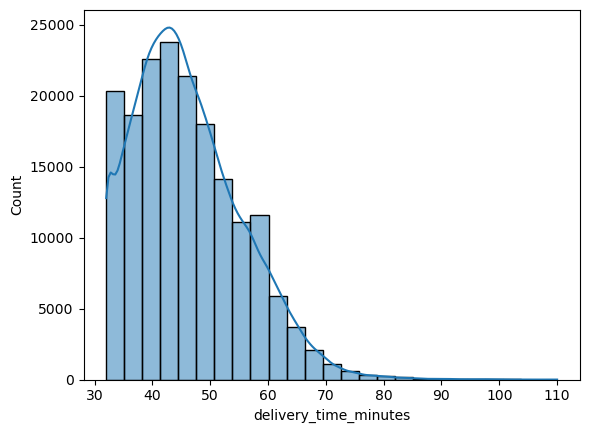

In [8]:
sns.histplot(df['delivery_time_minutes'], bins=25, kde=True) 

Our target feature is right-skewed.

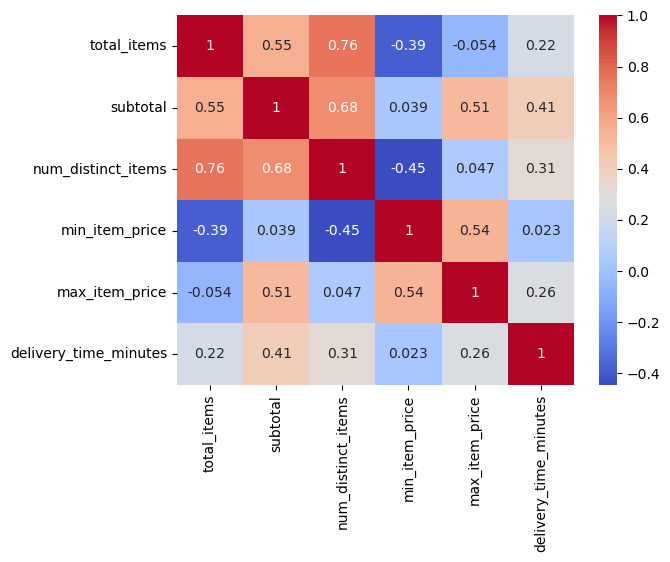

In [9]:
item_features = ['total_items', 'subtotal', 'num_distinct_items', 'min_item_price', 'max_item_price', 'delivery_time_minutes']
sns.heatmap(df[item_features].corr(), annot=True, cmap='coolwarm')
plt.show()

We can see in this correlation, more the number of items and subtotal, more is delivery_time, But still not a very strong correlation.

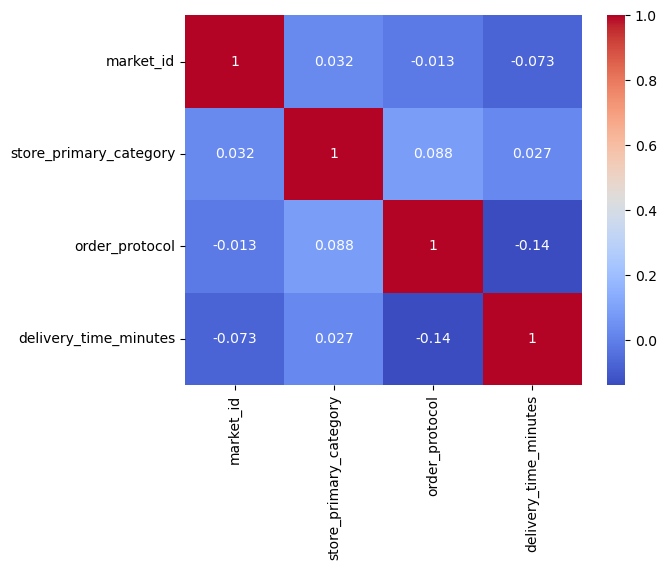

In [10]:
store_features = ['market_id', 'store_primary_category', 'order_protocol', 'delivery_time_minutes']
sns.heatmap(df[store_features].corr(), annot=True, cmap='coolwarm')
plt.show()


Very weak correlation from anything, but still order_protocol has tiny effect.

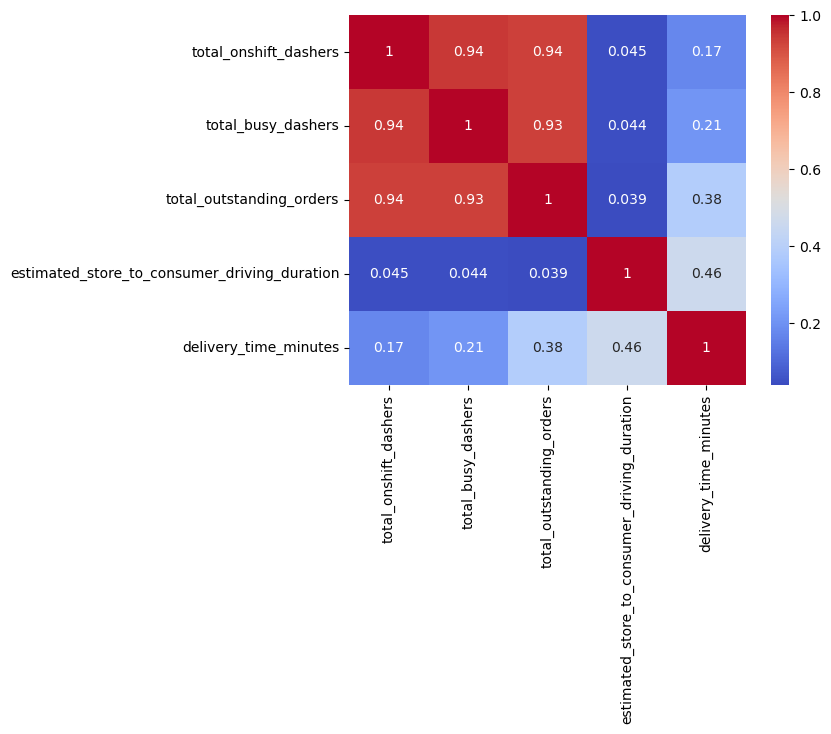

In [11]:
order_features = ['total_onshift_dashers', 'total_busy_dashers', 'total_outstanding_orders', 'estimated_store_to_consumer_driving_duration', 'delivery_time_minutes']
sns.heatmap(df[order_features].corr(), annot=True, cmap='coolwarm')
plt.show()

correlation between delivery_time and estimated driving duration shows that driving to the customer,is significant feature.

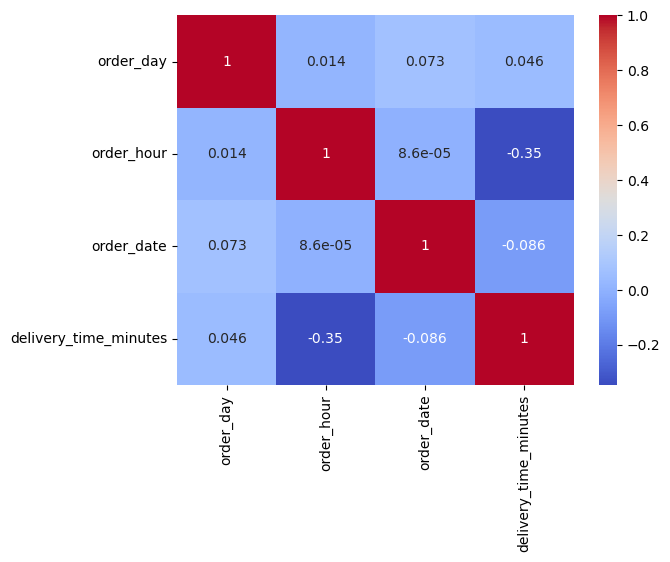

In [12]:
day_features = ['order_day', 'order_hour', 'order_date', 'delivery_time_minutes']
sns.heatmap(df[day_features].corr(), annot=True, cmap='coolwarm')
plt.show()

<Axes: >

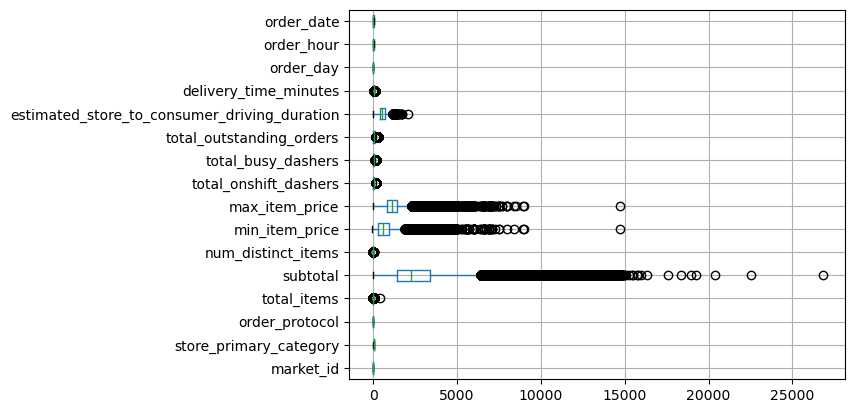

In [13]:
df.boxplot(vert=False)

<Axes: xlabel='total_items'>

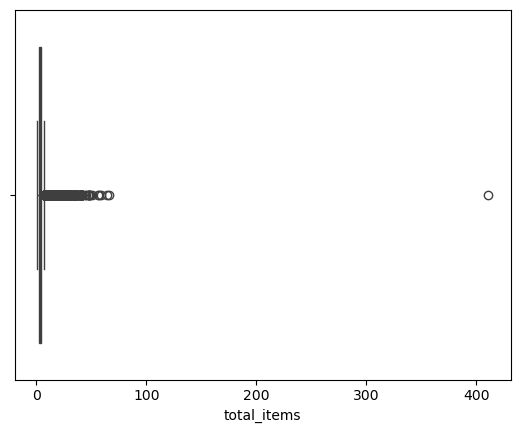

In [14]:
sns.boxplot(x=df['total_items'])

<Axes: xlabel='estimated_store_to_consumer_driving_duration'>

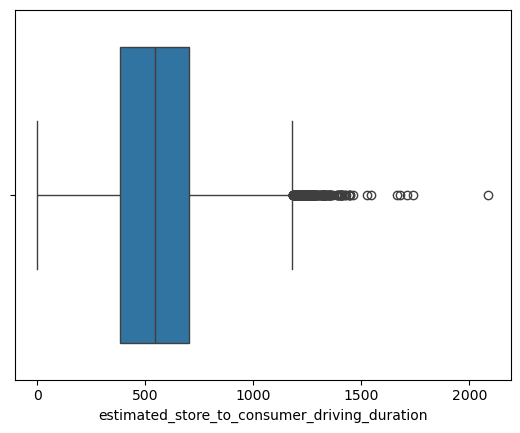

In [15]:
sns.boxplot(x=df['estimated_store_to_consumer_driving_duration'])

We can see there is one value in columns total_items, estimated_store_to_consumer_driving_duration, subtotal, min_item_price, maxt_item_price which is very far from rest, let's drop that row.

In [16]:
# let's create a copy before droping the rows.
df_clean = df.copy()
df_clean.drop(columns=['created_at', 'actual_delivery_time'], inplace=True) 
col_clean = ['total_items', 'estimated_store_to_consumer_driving_duration', 'subtotal', 'min_item_price', 'max_item_price']

for col in col_clean:
    i = df_clean[col].idxmax()
    df_clean.drop(i, inplace=True)

df_clean.reset_index(drop=True)

,market_id,store_primary_category,order_protocol,total_items,subtotal,num_distinct_items,min_item_price,max_item_price,total_onshift_dashers,total_busy_dashers,total_outstanding_orders,estimated_store_to_consumer_driving_duration,delivery_time_minutes,order_day,order_hour,order_date
0,1.0,4,1.0,4,3441,4,557,1239,33.0,14.0,21.0,861.0,47.0,4,22,6
1,2.0,46,2.0,1,1900,1,1400,1400,1.0,2.0,2.0,690.0,44.0,1,21,10
2,2.0,36,3.0,4,4771,3,820,1604,8.0,6.0,18.0,289.0,55.0,0,0,16
3,1.0,38,1.0,1,1525,1,1525,1525,5.0,6.0,8.0,795.0,59.0,3,3,12
4,1.0,38,1.0,2,3620,2,1425,2195,5.0,5.0,7.0,205.0,46.0,1,2,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175767,1.0,28,4.0,3,1389,3,345,649,17.0,17.0,23.0,331.0,43.0,1,0,17
175768,1.0,28,4.0,6,3010,4,405,825,12.0,11.0,14.0,915.0,62.0,4,0,13
175769,1.0,28,4.0,5,1836,3,300,399,39.0,41.0,40.0,795.0,46.0,5,4,24
175770,1.0,58,1.0,1,1175,1,535,535,7.0,7.0,12.0,384.0,45.0,6,18,1


<Axes: >

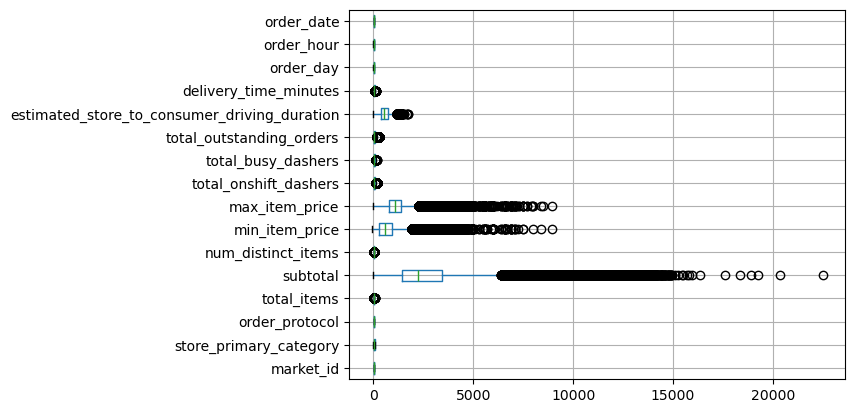

In [17]:
df_clean.boxplot(vert=False)

<Axes: >

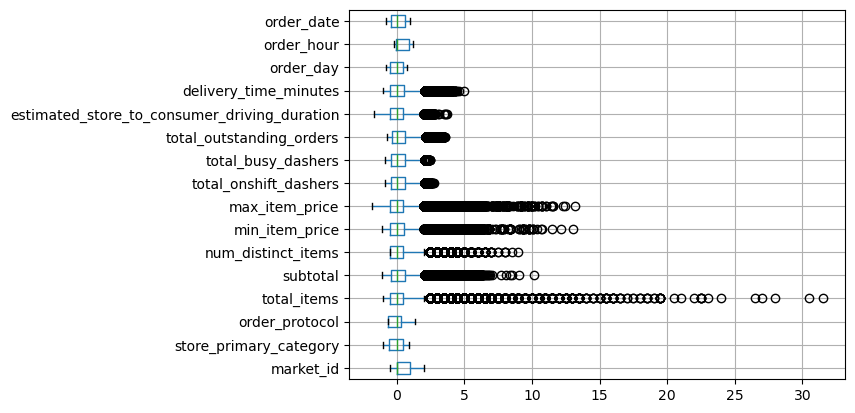

In [18]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_clean_rscaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_clean_rscaled.boxplot(vert=False)

Let' put a cap on the columns having extreme outliers

In [20]:
col_cap = ['total_items', 'subtotal', 'min_item_price', 'max_item_price', 'num_distinct_items', 'delivery_time_minutes', 'estimated_store_to_consumer_driving_duration']

for col in col_cap:
    cap = df_clean[col].quantile(0.99)
    df_clean[col] = df_clean[col].clip(upper=cap)

<Axes: >

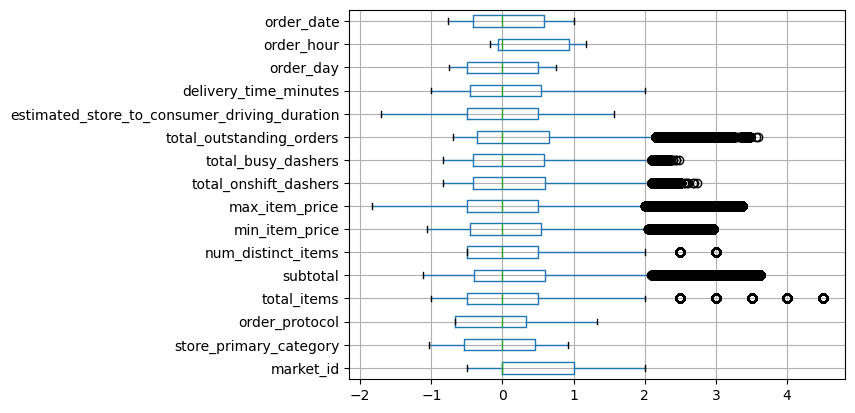

In [21]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
df_clean_rscaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
df_clean_rscaled.boxplot(vert=False)

Now the data looks much cleaner.

We handled outliers by two steps:
1) droping the rows having potential absurd values.
2) putting cap on extreme values.

# Data preprocessing

In [22]:
y = df_clean['delivery_time_minutes']
y.shape

(175772,)

In [23]:
X = df_clean.drop(columns=['delivery_time_minutes'])
X.shape

(175772, 15)

In [24]:
from sklearn.model_selection import train_test_split

X_dev, X_test, y_dev, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_dev, y_dev, test_size = 0.2, random_state=42)

print('Train: ', X_train.shape, y_train.shape)
print('Test: ', X_test.shape, y_test.shape)
print('Validation: ', X_val.shape, y_val.shape)

Train:  (112493, 15) (112493,)
Test:  (35155, 15) (35155,)
Validation:  (28124, 15) (28124,)


In [25]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)

<Axes: >

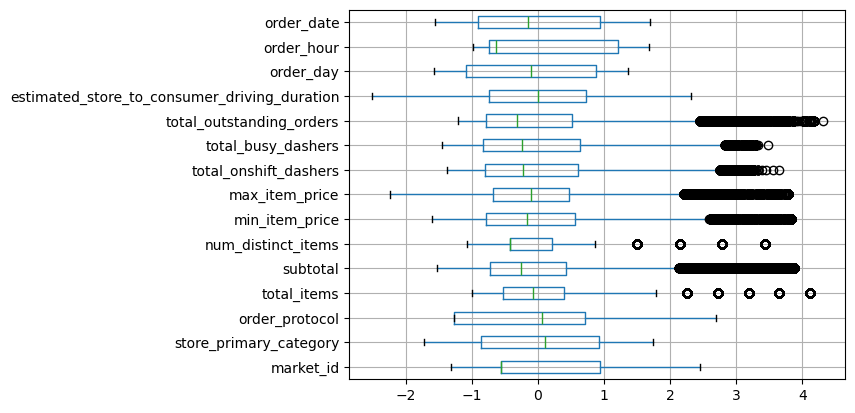

In [28]:
pd.DataFrame(X_train, columns=X.columns).boxplot(vert=False)

# Creating and training of model

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

2025-06-17 16:34:17.386799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1750158257.460561   29157 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1750158257.483382   29157 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1750158257.640923   29157 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750158257.640945   29157 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1750158257.640957   29157 computation_placer.cc:177] computation placer alr

In [30]:
model = Sequential([Dense(64, activation='relu', input_shape=(X_train.shape[1],), name='hidden_layer_1'),
                    Dense(32, activation='relu', name='hidden_layer_2'),
                    Dense(1, activation=None, name='output_layer')])

I0000 00:00:1750158262.756250   29157 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 3483 MB memory:  -> device: 0, name: NVIDIA GeForce GTX 1050 Ti, pci bus id: 0000:01:00.0, compute capability: 6.1


In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 64)             │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,137 (12.25 KB)

 Trainable params: 3,137 (12.25 KB)

 Non-trainable params: 0 (0.00 B)

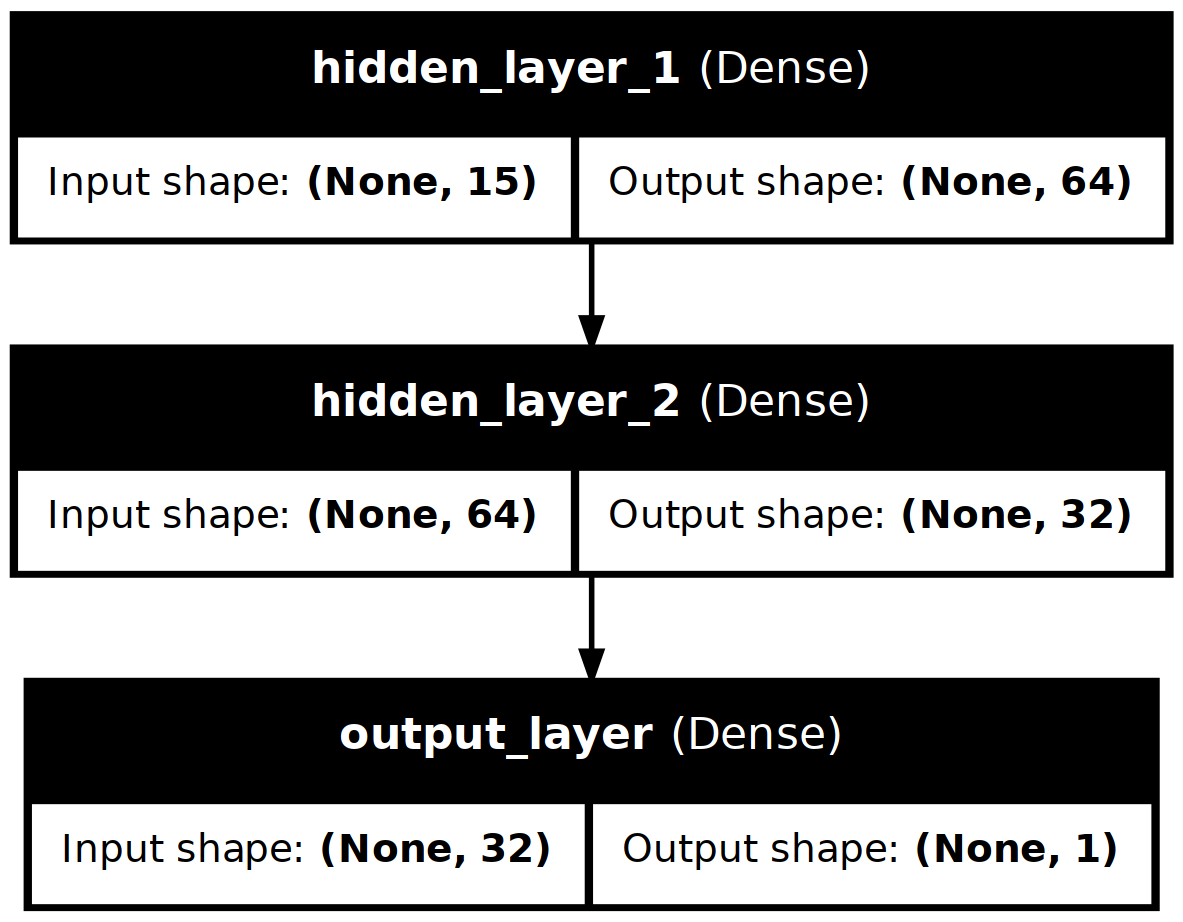

In [32]:
from tensorflow.keras.utils import plot_model

plot_model(model, to_file='Porter_NN_model.png', show_shapes=True, show_layer_names=True)

In [33]:
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae'])

In [34]:
model.fit(X_train, y_train, epochs=100, batch_size=256, validation_split=0.1, verbose=1)

Epoch 1/100


I0000 00:00:1750158285.009624   29476 service.cc:152] XLA service 0x7e08a0005360 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1750158285.009659   29476 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce GTX 1050 Ti, Compute Capability 6.1
2025-06-17 16:34:45.042944: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1750158285.183887   29476 cuda_dnn.cc:529] Loaded cuDNN version 90300


 58/396 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2080.1853 - mae: 44.6996

I0000 00:00:1750158285.956541   29476 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


396/396 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - loss: 1074.0698 - mae: 27.3691 - val_loss: 43.8441 - val_mae: 5.1087
Epoch 2/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 34.6593 - mae: 4.5508 - val_loss: 20.0152 - val_mae: 3.5093
Epoch 3/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 17.1831 - mae: 3.2590 - val_loss: 12.1279 - val_mae: 2.7533
Epoch 4/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 10.4990 - mae: 2.5316 - val_loss: 7.1498 - val_mae: 2.0629
Epoch 5/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 6.1419 - mae: 1.9087 - val_loss: 4.6535 - val_mae: 1.6212
Epoch 6/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 4.1841 - mae: 1.5385 - val_loss: 3.4894 - val_mae: 1.3670
Epoch 7/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 3.2004 - mae: 1.3179 - val_loss: 2.8533 - val_mae: 1.2250
Epoch 8/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 2.6261 - mae: 1.1735 - val_loss: 2.3873 - val_mae: 1.0921
Epoch 9/100
396/396 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/st